In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import *
from sklearn.utils import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow import keras

# Pima Diabete Dataset from Kaggle

Let's see if we are able to predict outcome for this data creating different models

## Description of the data

In [2]:
df = pd.read_csv('diabetes.csv')
df = shuffle(df)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 203 to 586
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


<AxesSubplot:xlabel='Outcome', ylabel='count'>

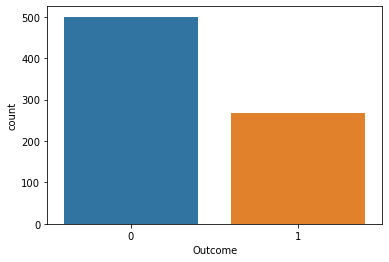

In [4]:
sns.countplot(x=df['Outcome'] ,data=df)

<AxesSubplot:>

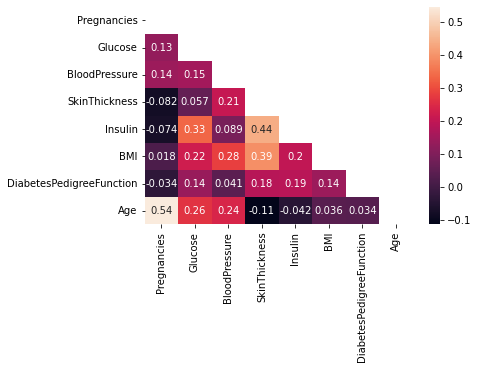

In [5]:
df_features = df.iloc[:,:-1]

corr_features = df_features.corr()
mask = np.triu(np.ones_like(corr_features))
sns.heatmap(corr_features, annot=True, mask=mask)

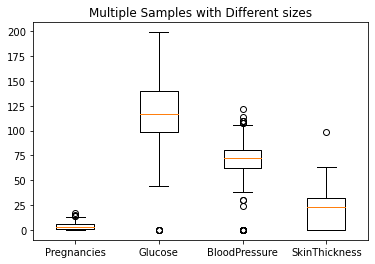

In [6]:
fig1, ax1 = plt.subplots()
ax1.set_title('Multiple Samples with Different sizes')
ax1.boxplot(df_features.iloc[:,:4],labels=df_features.columns[:4])
plt.show()

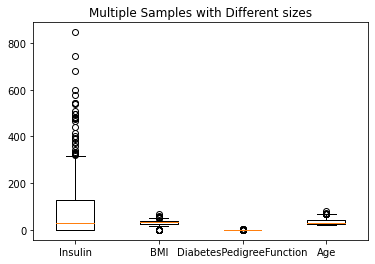

In [7]:
fig2, ax2 = plt.subplots()
ax2.set_title('Multiple Samples with Different sizes')
ax2.boxplot(df_features.iloc[:,4:],labels=df_features.columns[4:])
plt.show()

## Processing of the Data
For using a in a DNN and reduce importance of outliers we should use a scaler and a transformer

In [8]:
scaler = RobustScaler()

X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Classifier
<br>
The models used will be XGBoostClassifier, DNN classifier and K-means

### XGBoost

In [9]:
from xgboost import XGBClassifier

model_xgb =  XGBClassifier(use_label_encoder=False)
model_xgb.fit(X_train, y_train)

/opt/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[11:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [10]:
y_predic_xgb =  model_xgb.predict(X_test)
print(classification_report(y_test, y_predic_xgb))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       167
           1       0.64      0.66      0.65        87

    accuracy                           0.76       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254



### DNN

In [11]:
ann = Sequential([
  layers.Dense(units=8, activation='relu'),
  layers.Dense(units=1, activation='sigmoid')
])

ann.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam')

2022-06-09 11:15:48.298234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
ann.fit(x=X_train, y=y_train, epochs=200, 
    batch_size=1,
    validation_data=(X_test,y_test),
    callbacks=EarlyStopping(monitor='val_loss',patience=4))

Epoch 1/200


/opt/miniconda3/envs/ML/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


514/514 [==============================] - 1s 1ms/step - loss: 0.6614 - val_loss: 0.6004
Epoch 2/200
514/514 [==============================] - 1s 1ms/step - loss: 0.5715 - val_loss: 0.5316
Epoch 3/200
514/514 [==============================] - 1s 1ms/step - loss: 0.5254 - val_loss: 0.4937
Epoch 4/200
514/514 [==============================] - 1s 1ms/step - loss: 0.5026 - val_loss: 0.4769
Epoch 5/200
514/514 [==============================] - 1s 1ms/step - loss: 0.4909 - val_loss: 0.4704
Epoch 6/200
514/514 [==============================] - 1s 1ms/step - loss: 0.4860 - val_loss: 0.4624
Epoch 7/200
514/514 [==============================] - 1s 1ms/step - loss: 0.4807 - val_loss: 0.4566
Epoch 8/200
514/514 [==============================] - 1s 1ms/step - loss: 0.4781 - val_loss: 0.4563
Epoch 9/200
514/514 [==============================] - 1s 1ms/step - loss: 0.4765 - val_loss: 0.4523
Epoch 10/200
514/514 [==============================] - 1s 1ms/step - loss: 0.4745 - val_loss: 0.4512
E

<AxesSubplot:>

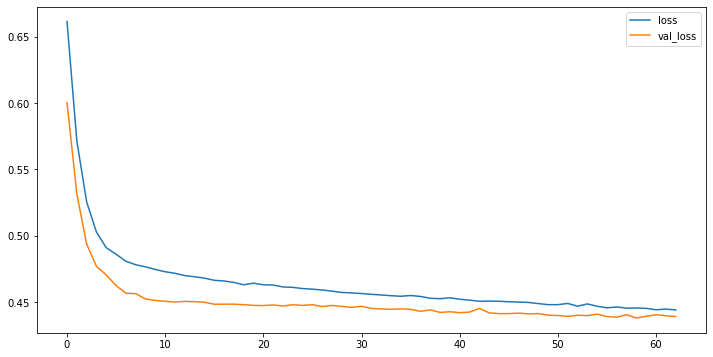

In [13]:
pd.DataFrame(ann.history.history).plot(figsize=(12,6))

In [14]:
y_predict_ann = ann.predict(X_test) > 0.5

8/8 [==============================] - 0s 1ms/step


In [15]:
print(classification_report(y_test,y_predict_ann))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       167
           1       0.76      0.61      0.68        87

    accuracy                           0.80       254
   macro avg       0.79      0.75      0.76       254
weighted avg       0.80      0.80      0.79       254

